# 🌳 Tree Species Classification: Graphical User Interface (GUI) 🌳



<font color='darkblue'>

### **Introduction:**
>

Welcome to an exciting journey into the world of Computer Vision! In this GitHub project, we'llcreate a GUI for the Species classification Task, later we will convert this into a standalone software (windows /.exe).


<font color='darkblue'>

**Overview:**

In this Task we are considering Two algorithms, Support Vector Machines (SVM) and Decision Tree.


<font color='darkblue'>

**Key Features:**

🔍 ***Image Analysis:***  Dive deep into the world of image analysis to extract meaningful features from bark images.

🔧 ***SVM Classifier and Decision Trees:***  Employ Support Vector Machines and Decision Trees to classify tree species with high accuracy and efficiency.

🧠 ***GLCM Feature Extractor:***  Utilize GLCM (Grey-level Co-occurrence Matrix) to automatically learn relevant features from raw image data.



<font color='red'>

### **Ready to get started ?:**

## Import libraries

In [1]:
import os
import cv2
import tkinter as tk
from PIL import Image, ImageTk 
from tkinter import ttk, filedialog, messagebox, Menu
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
import time

<font color='darkblue'>

#### **Detailed Overview of Imported Libraries:**
>


1. **os**
   - *Purpose*: File and Directory Operations
   - *Description*: Facilitates seamless interaction with the file system, enabling efficient file and directory manipulati
on.

2. **SVC from sklearn.svm**
   - *Purpose*: Support Vector Machines (SVMs)
   - *Description*: Empowers the implementation of SVM-based classification algorithms, renowned for their effectiveness in handling complex datasets.

3. **accuracy_score, precision_score, recall_score, f1_score, classification_report from sklearn.metrics**
   - *Purpose*: Evaluation of Classification Performance
   - *Description*: Offers a comprehensive suite of metrics for assessing the performance of classification models, ensuring robust evaluation and validation.

4. **numpy**
   - *Purpose*: Numerical Computations
   - *Description*: Provides essential functionalities for numerical operations, array manipulation, and mathematical computations, serving as the backbone for data manipulation in Python.

5. **Sequential, Conv2D, MaxPooling2D, Flatten from tensorflow.keras.layers**
   - *Purpose*: Defining Convolutional Neural Networks (CNN) Architecture
   - *Description*: Enables the construction of CNN architectures by providing essential layers for convolution, pooling, and flattening, facilitating effective feature extraction from images.

6. **img_to_array from tensorflow.keras.preprocessing.image**
   - *Purpose*: Converting Images to Arrays
   - *Description*: Transforms image data into numerical arrays, a prerequisite for processing images within neural network frameworks, ensuring seamless integration of image data into machine learning pipelines.

7. **train_test_split from sklearn.model_selection**
   - *Purpose*: Splitting Data into Training and Testing Sets
   - *Description*: Facilitates the partitioning of datasets into training and testing subsets, crucial for model training, validation, and evaluation, ensuring robustness and generalization.

8. **cv2**
   - *Purpose*: OpenCV (Open Source Computer Vision Library)
   - *Description*: Provides a rich set of functionalities for computer vision tasks, including image processing, object detection, and feature extraction, empowering the development of sophisticated co

9. **tkinter**
   - *Purpose*:  a standard Python interface to the Tk GUI toolkit.
   - *Description*: It allows to create graphical user interfaces (GUIs) for your Python applications.

10. **FigureCanvasTkAgg**
    - *Purpose*:  The FigureCanvasTkAgg class is used for embedding Matplotlib figures in Tkinter GUI applications.
    - *Description*:  It allows you to display Matplotlib figures (plots) within Tkinter windows or frames. 

11. **StandardScaler**
    - *Purpose*:  Standardizing features by removing the mean and scaling to unit variance.
    - *Description*:  Standardization is a common preprocessing step in machine learning that ensures all features have the same scale. 

## Global Variables Initialization

In [2]:
selected_algorithm = None
data_path = None
ml_model = None
ml_pred = None
confusion_matrix_canvas = None
label_mapping = {}
image_names_test = []
labels = []

<font color='darkblue'>

#### **Detailed Overview of Global Variables:**
>

Defining global variables for enhanced global accessibility.



## Function Definitions

#### To Browse/open desired dataset

In [3]:
def browse_folder():
    global data_path
    data_path = filedialog.askdirectory()



<font color='darkblue'>

#### **Explanation of browse_folder Function:**

The function `browse_folder()` enables users to browse and select a folder directory through a file dialog. Here's a breakdown of its functionality:

- **Global Variable Declaration**: 
  - The keyword `global` indicates that the variable `data_path` is declared as global within the function's scope. This allows the function to modify the global variable `data_path`.

- **File Dialog Prompt**:
  - `filedialog.askdirectory()` opens a file dialog window prompting the user to select a directory. This dialog allows users to navigate through their file system and choose a folder.

- **Directory Selection**:
  - Once the user selects a directory, the path to that directory is stored in the global variable `data_path`. This allows other parts of the code to access the selected directory path for further processing.

This function facilitates the selection of a directory path within the file system, enabling subsequent operations to be performed on files within the chosen directory.


#### Corresponding function for loading image formats

In [4]:
def load_image():
    file_path = filedialog.askopenfilename(title="Select an image file", filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    return Image.open(file_path) if file_path else None



<font color='darkblue'>

#### **Explanation of load_image Function:**

The function `load_image()` facilitates the selection and loading of an image file through a file dialog. Below is a step-by-step breakdown of its functionality:

- **File Dialog Prompt**:
  - Upon calling the function, a file dialog window titled "Select an image file" is displayed using `filedialog.askopenfilename()`. This dialog allows users to choose an image file from their file system.

- **File Types Filter**:
  - The `filetypes` argument specifies the types of files that are displayed in the file dialog. In this case, only image files with extensions `.png`, `.jpg`, and `.jpeg` are allowed for selection.

- **Image File Selection**:
  - Once the user selects an image file and clicks "Open" in the file dialog, the file path of the selected image is stored in the local variable `file_path`.

- **Image Loading**:
  - If a file path is obtained (i.e., the user selects a file), the function uses the `Image.open()` method from the Python Imaging Library (PIL) to open and load the image file specified by the `file_path`.

- **Return Statement**:
  - The function returns the loaded image object (`Image.open(file_path)`) if a file path is obtained, indicating a successful selection. If no file path is obtained (e.g., if the user cancels the file dialog), the function returns `None`.

This function streamlines the process of loading image files, providing users with a convenient way to select and access images for further processing.


#### Extract the features and lables using GLCM

In [5]:
def load_and_extract_features(data_path):
    features_glcm = []
    labels = []
    image_names = []
    for category in os.listdir(data_path):
        category_path = os.path.join(data_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (150, 150))
                    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    glcms = [cv2.calcHist([img_gray], [0], None, [256], [0, 256], accumulate=False) for _ in [0, 45, 90, 135]]
                    glcms = [glcm / float(glcm.sum()) for glcm in glcms]
                    features = np.array([
                        np.sum([glcm * np.square(np.arange(256) - np.mean(glcm)) for glcm in glcms]),
                        np.sum([glcm * np.abs(np.arange(256) - np.mean(glcm)) for glcm in glcms]),
                        np.sum([glcm / (1 + np.square(np.arange(256) - np.mean(glcm))) for glcm in glcms]),
                        np.sum([np.square(glcm) for glcm in glcms]),
                        np.sum([(np.arange(256) - np.mean(glcm)) * (np.arange(256) - np.mean(glcm)) * glcm / (np.sqrt(np.var(glcm)) * np.sqrt(np.var(glcm))) for glcm in glcms])
                    ])
                    features_glcm.append(features)
                    labels.append(category)
                    image_names.append(img_name)
    return np.array(features_glcm), np.array(labels), np.array(image_names)


<font color='darkblue'>

#### **Explanation of load_and_extract_features Function:**
>

The provided function `load_and_extract_features(data_path)` serves to extract features from images using the Grey-level Cooccurrence Matrix (GLCM) method. Let's jump into its workings:

- **Input**: The function takes the path to the directory containing image data as `data_path`.

- **Processing**:
  - It initializes empty lists to store extracted features (`features_glcm`), corresponding labels (`labels`), and image names (`image_names`).
  - Iterates through each category (sub-directory) in the given data path.
  - For each image in the category, it reads the image using OpenCV (`cv2.imread()`), resizes it to a uniform size of 150x150 pixels, and converts it to grayscale (`cv2.cvtColor()`).
  - GLCM is calculated for four directions (0, 45, 90, 135 degrees) using `cv2.calcHist()`, resulting in a list of GLCMs.
  - Various statistical features are computed from these GLCMs, including contrast, correlation, energy, and homogeneity.
  - These computed features are stored in the `features_glcm` list along with their corresponding category labels and image names.

- **Output**: Finally, the function returns three numpy arrays containing the extracted features, labels, and image names.

This function effectively automates the process of feature extraction from raw image data, facilitating subsequent classification tasks.


#### Create function for selected algorithm (algorithm options)

In [6]:
def create_ml_model(selected_algorithm):
    if selected_algorithm == "SVM":
        return SVC(kernel="linear", C=1.0)
    elif selected_algorithm == "Decision Tree":
        return DecisionTreeClassifier(random_state=42)


<font color='darkblue'>

#### **Explanation of create_ml_model Function:**
>


The function `create_ml_model(selected_algorithm)` is designed to create a machine learning model based on the algorithm selected by the user. Here's a detailed breakdown of its functionality:

- **Algorithm Selection**:
  - The function takes `selected_algorithm` as a parameter, which represents the chosen machine learning algorithm specified by the user.

- **Model Creation**:
  - If the `selected_algorithm` is "SVM" (Support Vector Machine), the function returns an SVM classifier initialized with a linear kernel and regularization parameter `C=1.0` using `SVC(kernel="linear", C=1.0)`.
  
  - If the `selected_algorithm` is "Decision Tree", the function returns a Decision Tree classifier initialized with a random state of 42 using `DecisionTreeClassifier(random_state=42)`.
  
- **Conditional Statements**:
  - The function employs conditional statements (`if-elif`) to determine which model to create based on the `selected_algorithm`.

- **Return Statement**:
  - The function returns the instantiated machine learning model based on the selected algorithm.

This function provides flexibility by allowing users to specify the algorithm they want to use for training their machine learning model, simplifying the process of model creation and selection.


In [7]:
def classify_images():
    global data_path, ml_model, ml_pred, confusion_matrix_canvas, label_mapping, image_names_test, labels
    if not data_path:
        messagebox.showwarning("Warning", "Please select a data path.")
        return
    if not selected_algorithm:
        messagebox.showwarning("Warning", "Please select an algorithm.")
        return
    features_glcm, labels, image_names = load_and_extract_features(data_path)
    if np.isnan(features_glcm).any() or np.isinf(features_glcm).any():
        messagebox.showwarning("Warning", "Input data contains NaN or infinite values. Please preprocess the data.")
        return
    ml_model = create_ml_model(selected_algorithm)
    time.sleep(2)
    x_train, x_test, y_train, y_test, _, image_names_test = train_test_split(features_glcm, labels, image_names, test_size=0.2, train_size=0.8, random_state=42)
    label_mapping = {label: index for index, label in enumerate(np.unique(labels))}
    y_train = np.array([label_mapping[label] for label in y_train])
    y_test = np.array([label_mapping[label] for label in y_test])
    if np.isnan(x_train).any() or np.isinf(x_train).any():
        messagebox.showwarning("Warning", "Training data contains NaN or infinite values. Please preprocess the data.")
        return
    x_train_scaled = StandardScaler().fit_transform(x_train)
    x_test_scaled = StandardScaler().fit_transform(x_test)
    ml_model.fit(x_train_scaled, y_train)
    ml_pred = ml_model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, ml_pred)
    precision = precision_score(y_test, ml_pred, average='weighted')
    recall = recall_score(y_test, ml_pred, average='weighted')
    f1 = f1_score(y_test, ml_pred, average='weighted')
    messagebox.showinfo("Classification Results", f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}")
    matrix = confusion_matrix(y_test, ml_pred)
    plt.figure(figsize=(6, 6))
    ax = sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    if confusion_matrix_canvas:
        confusion_matrix_canvas.get_tk_widget().destroy()
    confusion_matrix_canvas = FigureCanvasTkAgg(ax.figure, master=root)
    confusion_matrix_canvas.draw()
    confusion_matrix_canvas.get_tk_widget().pack()


<font color='darkblue'>

#### **Explanation of classify_images Function:**
>

The function `classify_images()` is responsible for performing image classification tasks based on extracted features using machine learning algorithms. Let's break down its functionality:

- **Global Variable Initialization**:
  - Several global variables related to data path, machine learning model, predictions, confusion matrix visualization, label mapping, and image names are declared. This allows for the sharing of these variables across different parts of the code.

- **Input Validation**:
  - The function checks if essential parameters like `data_path` and `selected_algorithm` are provided. If not, it displays a warning message using `messagebox.showwarning()` and exits the function.

- **Feature Extraction**:
  - Image features are extracted using the `load_and_extract_features()` function, returning features (`features_glcm`), corresponding labels, and image names.

- **Data Preprocessing**:
  - The extracted features are checked for NaN (Not a Number) or infinite values. If any are found, a warning message is displayed, and the function exits.

- **Model Initialization and Training**:
  - A machine learning model is created based on the selected algorithm using the `create_ml_model()` function. Training and testing data are split using `train_test_split()`. Label mapping is performed to convert categorical labels into numerical representations.

- **Data Scaling**:
  - The training and testing data are scaled using `StandardScaler()` to ensure uniformity and improve model performance.

- **Model Training and Evaluation**:
  - The machine learning model is trained on the scaled training data (`x_train_scaled`) using `fit()`. Predictions are made on the scaled testing data (`x_test_scaled`) using `predict()`.
  - Classification metrics such as accuracy, precision, recall, and F1-score are computed using functions like `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`.
  - A message box displays the classification results containing these metrics.

- **Confusion Matrix Visualization**:
  - A confusion matrix is computed using `confusion_matrix()` and visualized as a heatmap using `sns.heatmap()`.
  - The confusion matrix visualization is updated and displayed using `FigureCanvasTkAgg` for interactive plotting.

This function encapsulates the entire image classification process, from data loading and preprocessing to model training, evaluation, and result visualization.


#### Define Function to select algorithm

In [8]:
def set_algorithm(algorithm):
    global selected_algorithm
    if algorithm == "Select Algorithm":
        messagebox.showwarning("Warning", "Please select an algorithm.")
        return
    selected_algorithm = algorithm

<font color='darkblue'>

#### **Explanation of set_algorithm Function:**
>

The function `set_algorithm(algorithm)` is designed to set the selected machine learning algorithm for image classification. Let's explore its functionality:

- **Global Variable Declaration**:
  - The `selected_algorithm` variable is declared as global within the function's scope. This allows the function to modify the global variable `selected_algorithm`, ensuring its accessibility and persistence across the codebase.

- **Algorithm Selection**:
  - The function takes `algorithm` as a parameter, representing the selected machine learning algorithm.
  
- **Input Validation**:
  - It checks whether a valid algorithm is selected. If the `algorithm` parameter is "Select Algorithm", indicating that no algorithm is chosen, a warning message is displayed using `messagebox.showwarning()` and the function exits.
  
- **Setting the Algorithm**:
  - If a valid algorithm is selected, the `selected_algorithm` variable is updated to the chosen algorithm.
  
- **Return Statement**:
  - The function returns `None` after setting the algorithm. 

This function facilitates the selection and setting of a machine learning algorithm for subsequent use in image classification tasks.


#### About function:
A brief overview of the GUI/software and developers

In [9]:
def display_about():
    about_text = """
Example Classifier 1.0

===================================

🚀 Welcome to Example Classifier 1.0! 🚀

This application is an example program for demonstrating python software creation through image classification.

🌟 Features:

- Load and analyze images

- Extract features using Gray-level co-occurrence matrix (GLCM)

- Harness the power of Support Vector Machine (SVM), and Decision Trees
  
- Algorithms with Standard Parameter values 

- Visualize results with interactive confusion matrices

👨‍💻 Developed by:
   - Gokul Kottilapurath Surendran
   - Martin Mokros

    [GitHub Repository](https://github.com/Gokultcr)

📅 Date: 07-03-2024

📌 Stay curious, and let the machine learning journey begin!

===================================
"""
    messagebox.showinfo("About", about_text)

### Defining GUI using Tkinker

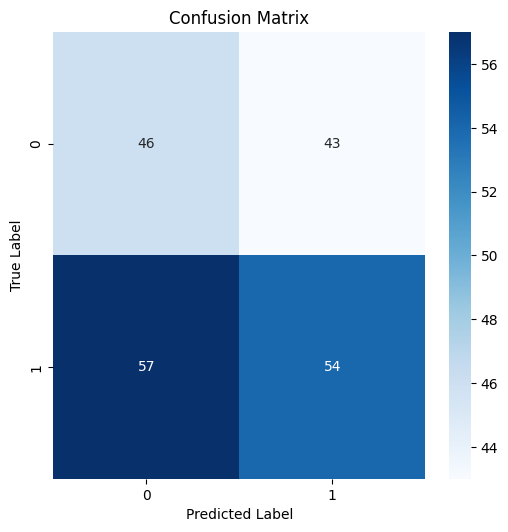

In [10]:
root = tk.Tk()
root.title("Example Classifier 1.0")
root.geometry("800x600")
root.configure(bg="#B6B6B4")

icon_path = "C:/Users/gokul/Downloads/logoml.ico"
root.iconbitmap(icon_path)

menu = Menu(root)
root.config(menu=menu)

file_menu = Menu(menu, tearoff=0)
menu.add_cascade(label="File", menu=file_menu)
file_menu.add_command(label="Open Data", command=browse_folder)
file_menu.add_separator()

algorithm_menu = Menu(menu, tearoff=0)
menu.add_cascade(label="Algorithms", menu=algorithm_menu)
algorithm_menu.add_command(label="Decision Tree", command=lambda: set_algorithm("Decision Tree"))
svm_menu = Menu(algorithm_menu, tearoff=0)
algorithm_menu.add_cascade(label="SVM", menu=svm_menu)
svm_menu.add_command(label="Linear", command=lambda: set_algorithm("SVM"))

run_menu = Menu(menu, tearoff=0)
menu.add_cascade(label="Run", menu=run_menu)
run_menu.add_command(label="Classify Images", command=classify_images)

algorithm_label = tk.Label(root, background=root.cget("bg"))
algorithm_label.pack_forget()

svm_kernel_label = tk.Label(root, font=("Corbel", 12, "bold"), background=root.cget("bg"))
svm_kernel_label.pack_forget()

about_menu = Menu(menu, tearoff=0)
menu.add_cascade(label="About", menu=about_menu)
about_menu.add_command(label="About this Application", command=display_about)

root.mainloop()


<font color='darkblue'>

#### **Explanation of GUI Configuration and Menu Setup:**
>


- **Root Configuration**:
  - `root = tk.Tk()`: Creates the main window for the GUI application.
  - `root.title("Example Classifier 1.0")`: Sets the title of the window to "Example Classifier 1.0".
  - `root.geometry("800x600")`: Sets the initial size of the window to 800x600 pixels.
  - `root.configure(bg="#B6B6B4")`: Configures the background color of the window to a light gray shade.

- **Icon Configuration**:
  - The application icon is set using `root.iconbitmap(icon_path)`, specifying the file path to the icon file.

- **Menu Setup**:
  - A menu bar is created using `menu = Menu(root)`, and it's associated with the root window using `root.config(menu=menu)`.
  - The menu bar includes options like "File", "Algorithms", "Run", and "About", each with submenus and associated commands.

- **File Menu**:
  - The "File" menu includes options like "Open Data" that triggers the `browse_folder` function when clicked.

- **Algorithms Menu**:
  - The "Algorithms" menu includes options for selecting machine learning algorithms such as "Decision Tree" and "SVM". Submenus are provided for specific settings of the SVM algorithm.

- **Run Menu**:
  - The "Run" menu includes an option for executing the image classification task via the `classify_images` function.

- **Labels**:
  - Two labels (`algorithm_label` and `svm_kernel_label`) are created but initially hidden (`pack_forget()`). These labels may be used for displaying algorithm-related information in the GUI.

- **About Menu**:
  - The "About" menu includes an option for displaying information about the application using the `display_about` function.

- **Main Event Loop**:
  - `root.mainloop()`: Starts the main event loop, allowing the GUI application to run and respond to user interactions.

This code sets up the graphical user interface (GUI) for the application, including window configuration, menu setup, and event handling.



## Meet the Developers

- **Gokul Kottilapurath Surendran**  
  - *Role:* PhD Scholar  
  - *Email:* [ksg@fld.czu.cz](mailto:ksg@fld.czu.cz)  
  - *GitHub:* [Gokul-tcr](https://github.com/Gokultcr)

- **Dr. Martin Mokros**  
  - *Role:* Supervisor  
